# タクシーマッチング問題

タクシーマッチング問題とは、複数名の顧客と複数台のタクシーの位置がそれぞれ与えられている場合に、配車コストを最小化する問題です。

配車コストには様々な定義が考えられますが、ここでは簡単のためタクシーと顧客間の総距離とします。

タクシーと顧客のマッチングを行い、それぞれのタクシーと向かう先の顧客との距離の合計を最小化するように配車先の決定を行います。

## 問題の定式化

まず、ここでの問題の前提条件として、$N$人の顧客と、それと同じ数$N$台のタクシーがあるとします。

インデックス $i, j = 0, 1, \cdots, N -1$ の顧客の座標 $Lc_i = (c_{i,x}, c_{i,y})$ とタクシーの座標 $Lt_j = (t_{j,x}, t_{j,y})$ が与えられているとします。

これらの座標から、顧客 $i$ とタクシー $j$ の距離を

$$
d_{ij} = \sqrt{(c_{i,x} - t_{j,x})^2 + (c_{i,y} - t_{j,y})^2}
$$

とします。

### 決定変数

どの顧客がどのタクシーに割り当てられるのか、顧客を $i$ タクシー $j$ として変数 $q_{ij}$ で表します。

変数は $N \times N$ の2次元配列のQUBO変数を考え、

$q_{ij}=1$ の場合はそのタクシーがその顧客に割り当てられる、$q_{ij}=0$ の場合は割り当てられないと定義します。

|顧客 \ タクシー| $0$ | $1$ | ... | $N-1$|  
|:---:|:---:|:---:|:---:|:---:|
|$0$| $q_{0,0}$ | $q_{0,1}$ | ... | $q_{0,N-1}$|
|$1$| $q_{1,0}$ | $q_{1,1}$ | ... | $q_{1,N-1}$|
|$\vdots$| $\vdots$ | $\vdots$ | ... | $\vdots$|
|$N -1$| $q_{N-1,0}$ | $q_{N-1,1}$ | ... | $q_{N-1,N-1}$|

### 目的関数

上記の QUBO変数を用いて、マッチングされた顧客とタクシーの合計の距離である目的関数は以下のように与えられます。  
変数 $q_{ij}$ は $1$ の場合に顧客 $i$ とタクシー $j$ がマッチングしているという意味なので、結果として $q_{ij} = 1$ となっている距離だけを足し上げています。

$$
\sum_{i, j=0}^{N-1}d_{ij}q_{ij}
$$

### 制約条件

次に制約条件を定めます。

まず、一人の顧客に必ず一台のタクシーを割り当てるので、顧客 $i$ に対して

$$
\sum_{j=0}^{N -1}q_{ij} = 1
$$

という one-hot 制約条件が必要となります。

さらに、一台のタクシーは必ず一人の顧客に割り当てられるので、タクシー $j$ に対して、

$$
\sum_{i=0}^{N -1}q_{ij} = 1
$$

という one-hot 制約条件も必要となります。


## 問題の実装

顧客とタクシーの位置座標が入力データとして必要となるので、顧客とタクシーの座標をランダムに生成して、顧客とタクシー全ての組み合わせの距離を計算する関数を作ります。

In [1]:
%matplotlib inline

In [11]:
token = "AE/rKyHjAKqvva0PLmfS2RfQ3EnIpY7lNze"  # ご自身のトークンを入力

In [2]:
import numpy as np

# 顧客とタクシーの座標をランダムに生成し、顧客とタクシーの距離を計算
def gen_random_locations(N_customers: int, N_taxies: int):
    # 顧客の座標
    loc_customers = np.random.uniform(size=(N_customers, 2))

    # タクシーの座標
    loc_taxies = np.random.uniform(size=(N_taxies, 2))

    # 顧客とタクシーの距離を行列形式で計算
    all_diffs = np.expand_dims(loc_customers, axis=1) - np.expand_dims(
        loc_taxies, axis=0
    )
    distances = np.sqrt(np.sum(all_diffs ** 2, axis=-1))

    return loc_customers, loc_taxies, distances

また、可視化のために、顧客とタクシーの座標を与えると、それらの座標をプロットする関数も作ります。

In [3]:
import matplotlib.pyplot as plt

# 顧客とタクシーの位置を可視化
def show_plot(loc_customers: np.ndarray, loc_taxies: np.ndarray):
    markersize = 100
    plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(
        *zip(*loc_customers), label="Customers", marker="o", color="red", s=markersize
    )
    plt.scatter(
        *zip(*loc_taxies), label="Taxies", marker="^", color="blue", s=markersize
    )

    plt.legend(loc="upper right")
    plt.show()

顧客数とタクシー台数に対応する `N` を定め、それらの座標と距離を先ほど定義した `gen_random_locations` 関数で生成します。

生成された結果をプロットして、顧客とタクシーの位置を可視化します。

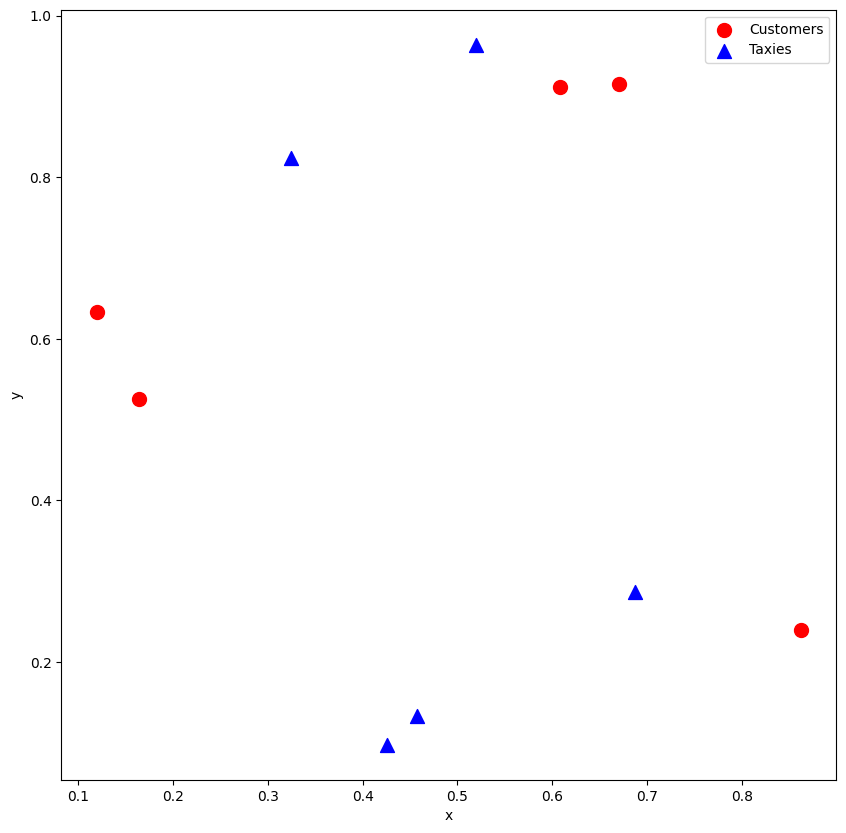

In [4]:
N = 5

# 顧客の座標, タクシーの座標, 顧客とタクシー間の距離行列を受け取る
Lc, Lt, d = gen_random_locations(N_customers=N, N_taxies=N)

show_plot(Lc, Lt)

In [6]:
d

array([[0.29702183, 0.83437776, 0.79321404, 0.10275402, 0.62981237],
       [0.79385361, 0.45857952, 0.41890035, 0.80116045, 0.18124659],
       [0.2799019 , 0.61732792, 0.6034225 , 0.5189254 , 0.66513713],
       [0.33858665, 0.50167388, 0.48950012, 0.56418816, 0.57483144],
       [0.35737109, 0.85371439, 0.81101374, 0.15783669, 0.62897959]])

### 二値多項式模型の構築

次に必要となる QUBO変数を定義します。

$N$人の各顧客に対して $N$ 台のタクシーを対応させることを考えるので、$N\times N$の2次元配列として QUBO変数を以下のように定義します。

In [7]:
from amplify import BinarySymbolGenerator

gen = BinarySymbolGenerator()

# QUBO変数を生成
q = gen.array(N, N)
q

[[ q_0,  q_1,  q_2,  q_3,  q_4],
 [ q_5,  q_6,  q_7,  q_8,  q_9],
 [q_10, q_11, q_12, q_13, q_14],
 [q_15, q_16, q_17, q_18, q_19],
 [q_20, q_21, q_22, q_23, q_24]]

この QUBO変数を用いて 目的関数は以下のように得られます。

In [8]:
cost = 0
for i in range(N):
    for j in range(N):
        cost += d[i, j] * q[i, j]

# 目的関数を以下のように書くこともできます
# cost2 = (d * q).sum()

次に、制約条件を定めます。

冒頭で説明した2つの制約条件を `one_hot` 関数を用いて以下のように表し、それらを足し上げて制約条件オブジェクトを構築します。

In [9]:
from amplify import BinaryQuadraticModel
from amplify.constraint import one_hot

# 一台のタクシーは必ず一人の顧客に割り当てる
c_customers = sum([one_hot(q[:, j]) for j in range(N)])

# 一人の顧客に必ず一台のタクシーを割り当てる
c_taxies = sum([one_hot(q[i, :]) for i in range(N)])

constraints = c_taxies + c_customers

目的関数と制約条件を足すことで、最終的な二値多項式模型を以下のように得ることができます。

ここで、目的関数に対する制約条件の強さが重要になります。

結論だけ述べると $d_{ij}$ の最大値にしておけば十分です。どの程度の強さが必要なのかに関する議論はここでは割愛します。

In [10]:
constraints *= np.amax(d)  # 強さを設定
model = cost + constraints

### イジングマシンの実行

イジングマシンのクライアントを `FixstarsClient` に設定し、さらにソルバーを作成して、以下のように問題を解きます。

In [12]:
from amplify import Solver
from amplify.client import FixstarsClient

# クライアントを設定
client = FixstarsClient()
client.token = token
client.parameters.timeout = 1000  # タイムアウト1秒

# ソルバーを設定
solver = Solver(client)

# 問題を解く
result = solver.solve(model)

得られた解は、以下のようにして確認することができます。

decode 関数を用いて、始めに定義した変数に代入することで、最終的な解を得ることができます。

In [13]:
# result が空の場合は制約条件が満たされず、解が求まらない
if len(result) == 0:
    raise RuntimeError("Given constraint conditions are not satisfied")

solution = q.decode(result[0].values)

決定変数の配列は $i$ 番目の行の $j$ 番目の列に $1$ がある場合は、顧客 $i$ にタクシー $j$ を割り当てるという意味でした。

したがって、以下のようにしてどの顧客にどのタクシーをマッチさせるかという情報を取得することができます。

In [14]:
customers = np.where(solution == 1)[0]
taxies = np.where(solution == 1)[1]
matches = list(zip(customers, taxies))

最後に、得られた顧客とタクシーのマッチングのデータを可視化します。

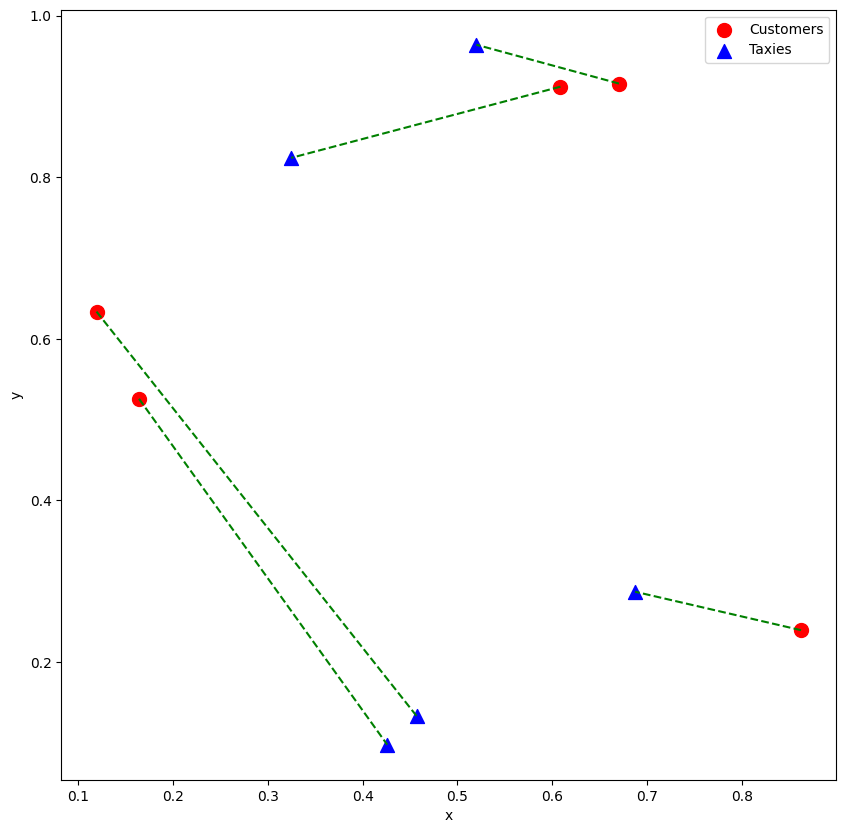

In [15]:
def plot_matching(loc_customers, loc_taxies, matches):
    markersize = 100
    plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(
        *zip(*loc_customers), label="Customers", marker="o", color="red", s=markersize
    )
    plt.scatter(
        *zip(*loc_taxies), label="Taxies", marker="^", color="blue", s=markersize
    )

    for i, j in matches:
        xc, yc = loc_customers[i]
        xt, yt = loc_taxies[j]
        plt.plot([xc, xt], [yc, yt], color="green", linestyle="--")

    plt.legend(loc="upper right")

    plt.show()


plot_matching(loc_customers=Lc, loc_taxies=Lt, matches=matches)

# 発展課題

ここまでは、顧客の人数とタクシーの台数が等しい場合のタクシーマッチング問題を扱いました。

しかしながら、一般的には顧客数とタクシー台数は異なる数であってもよいので、そのように問題を拡張することを考えます。

変更点は下記の通りです。

まず、$N_c$人の顧客と$N_t$台のタクシーとそれらの座標が与えられ、これまで通り顧客 $i$ と タクシー $j$ の距離 $d_{ij}$ が計算可能とします。

### 目的関数

目的関数もこれまでと同様ですが、$N_c$ と $N_t$ が異なる値であることも考慮します。

$$
\sum_{i=0}^{N_c-1}\sum_{j=0}^{N_t - 1}d_{ij}q_{ij}
$$


### 制約条件

タクシーの台数が足りている場合は。一人の顧客に一台のタクシーが割り当てられます。

しかし、またはタクシーの台数が足りない場合は割り当てられないことも考慮します。そのため、顧客 $i$ に対して

$$
\sum_{j=0}^{N_{\rm t}-1}q_{ij} = 1 \left( N_c \le N_t\right)
$$

$$
\sum_{j=0}^{N_{\rm t}-1}q_{ij} \le 1 \left( N_c > N_t\right)
$$

という制約条件が必要となります。

さらにタクシーについても、タクシー台数以上に顧客人数がいれば、一台のタクシーは必ず一人の顧客に割り当てられますが、

そうでない場合はどの顧客にも割り当てられないタクシーが存在することも考慮します。

そのため、タクシー $j$ に対して、

$$
\sum_{i=0}^{N_{\rm c} -1}q_{ij} \le 1 \left( N_c < N_t\right)
$$

$$
\sum_{i=0}^{N_{\rm c} -1}q_{ij} = 1 \left( N_c \ge N_t\right)
$$

という制約条件が必要となります。

## ヒント
amplifyには不等式制約を扱うためのヘルパー関数として `less_equal` 関数が用意されています。

参考：https://amplify.fixstars.com/ja/docs/constraint.html

## 問題1

上記の定式化を用いてタクシー台数と顧客人数が異なる場合を考慮して実装してください。